# Lab_02-1 데이터 전처리

### Context
#### Scaling
- Min-Max Normalize
- Standard Normalize
- Log Transformation
- Box-Cox, Yeo-Johnson, Quantile Transformation

#### Imputation
- Mean, Median, Mode Imputation
- Iterative Imputation

#### Categorical Variable to Numeric Variable
+ Label Encoding
+ One-hot Encoding

In [ ]:
import os
from os.path import join
from pathlib import Path
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ROOT_PATH = Path('/content/drive/MyDrive/Basic_ML/')

In [ ]:
example_file = join(ROOT_PATH, 'data', 'Hospital', 'train.csv')

#### 데이터 정보

    train.csv - 의료기관이 폐업했는지 여부를 포함하여 최근 2개년의 재무정보와 병원 기본정보
    test.csv - 폐업 여부를 제외하고 train.csv와 동일
    sample_submission.csv - inst_id와 open과 close를 예측하는 OC 두개의 열로 구성. OC의 값은 open 예측일 경우 1, close 예측일 경우 0.



    inst_id - 각 파일에서의 병원 고유 번호
    OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함
    sido – 병원의 광역 지역 정보
    sgg – 병원의 시군구 자료
    openDate – 병원 설립일
    bedCount - 병원이 갖추고 있는 병상의 수
    instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류
    ·        종합병원 : 입원환자 100명 이상 수용 가능
    ·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능
    ·        의원 : 입원 환자 30명 이하 수용 가능
    ·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  
    revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함
    salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함
    sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함
    salary1 – 급여, 2017(회계년도)년 데이터를 의미함
    noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함
    noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함
    Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함
    ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함
    Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함
    liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함
    quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함
    receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함
    inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함
    nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함
    tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함
    OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함
    receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함
    debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함
    liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함
    shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함
    NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함
    longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함
    netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함
    surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함
    revenue2 – 매출액, 2016(회계년도)년 데이터를 의미함
    salescost2 – 매출원가, 2016(회계년도)년 데이터를 의미함
    sga2 - 판매비와 관리비, 2016(회계년도)년 데이터를 의미함
    salary2 – 급여, 2016(회계년도)년 데이터를 의미함
    noi2 – 영업외수익, 2016(회계년도)년 데이터를 의미함
    noe2 – 영업외비용, 2016(회계년도)년 데이터를 의미함
    interest2 – 이자비용, 2016(회계년도)년 데이터를 의미함
    ctax2 – 법인세비용, 2016(회계년도)년 데이터를 의미함
    profit2 – 당기순이익, 2016(회계년도)년 데이터를 의미함
    liquidAsset2 – 유동자산, 2016(회계년도)년 데이터를 의미함
    quickAsset2 – 당좌자산, 2016(회계년도)년 데이터를 의미함
    receivableS2 - 미수금(단기), 2016(회계년도)년 데이터를 의미함
    inventoryAsset2 – 재고자산, 2016(회계년도)년 데이터를 의미함
    nonCAsset2 – 비유동자산, 2016(회계년도)년 데이터를 의미함
    tanAsset2 – 유형자산, 2016(회계년도)년 데이터를 의미함
    OnonCAsset2 - 기타 비유동자산, 2016(회계년도)년 데이터를 의미함
    receivableL2 – 장기미수금, 2016(회계년도)년 데이터를 의미함
    Debt2 – 부채총계, 2016(회계년도)년 데이터를 의미함
    liquidLiabilities2 – 유동부채, 2016(회계년도)년 데이터를 의미함
    shortLoan2 – 단기차입금, 2016(회계년도)년 데이터를 의미함
    NCLiabilities2 – 비유동부채, 2016(회계년도)년 데이터를 의미함
    longLoan2 – 장기차입금, 2016(회계년도)년 데이터를 의미함
    netAsset2 – 순자산총계, 2016(회계년도)년 데이터를 의미함
    surplus2 – 이익잉여금, 2016(회계년도)년 데이터를 의미함
    employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함
    employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함
    ownerChange – 대표자의 변동

In [ ]:
data = pd.read_csv(example_file)
label = data['OC']

df.head() 함수로 맨앞 5개의 데이터를 확인할 수 있습니다.

In [ ]:
data.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [ ]:
data.shape

(301, 58)

Pandas DataFrame에서 특정 컬럼을 제거하는 방법은 df.drop(컬럼리스트) 또는 del df[컬럼이름] 을 사용해 제거할 수 있습니다.

In [ ]:
#del data['OC']

data.drop(columns=['OC'], inplace=True)
#inplace가 true여야 실제 값이 바뀐다.

개/폐업 컬럼이 제거되었습니다.

In [ ]:
data.head()

,inst_id,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


df.describe() 함수는 각 변수별 평균, 표준편차, 최대, 최소, 사분위수 등의 기초 통계량을 확인할 수 있습니다.

In [ ]:
data.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.500000,53.750000
50%,230.000000,75.000000,2.007113e+07,136.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,80.000000,79.000000
75%,321.000000,123.000000,2.011102e+07,193.000000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,181.500000,170.000000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.000000,1200.000000


df.info() 함수로 각 변수들의 자료형을 확인할 수 있습니다.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   sido                301 non-null    object 
 2   sgg                 301 non-null    int64  
 3   openDate            301 non-null    int64  
 4   bedCount            296 non-null    float64
 5   instkind            300 non-null    object 
 6   revenue1            293 non-null    float64
 7   salescost1          293 non-null    float64
 8   sga1                293 non-null    float64
 9   salary1             293 non-null    float64
 10  noi1                293 non-null    float64
 11  noe1                293 non-null    float64
 12  interest1           293 non-null    float64
 13  ctax1               293 non-null    float64
 14  profit1             293 non-null    float64
 15  liquidAsset1        293 non-null    float64
 16  quickAss

In [ ]:
# DF.info에서 Object type을 가진 컬럼은 모두 범주형 변수
#헷갈리면 바로 위 셀을 보도록 하자.
cat_columns = data.select_dtypes(include='object').columns
num_columns = data.select_dtypes(exclude='object').columns

print('Categorical Columns: \n{}\n\n Numeric Columns: \n{}\n'.format(cat_columns, num_columns))

Categorical Columns: 
Index(['sido', 'instkind', 'ownerChange'], dtype='object')

 Numeric Columns: 
Index(['inst_id', 'sgg', 'openDate', 'bedCount', 'revenue1', 'salescost1',
       'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
       'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1',
       'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
       'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1',
       'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2',
       'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
       'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2',
       'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
       'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2',
       'netAsset2', 'surplus2', 'employee1', 'employee2'],
      dtype='object')



# Scaling
## 스케일링을 왜 해야할까요?
변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target 에 미치는 영향력이 제대로 표현되지 않을 수 있습니다.<br>
Sklearn의 대표적인 스케일링 함수로는 특정 변수의 최대, 최소 값으로 조절하는 Min-Max 스케일링과 z-정규화를 이용한 Standard 스케일링이 있습니다.
### 1. Min-Max Scaling
- Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됩니다. <br>
수식을 직관적으로 이해해보면, X에 존재하는 어떤 가장 작은 값 x <sub>m</sub>에 대해서 x <sub>m</sub>는 Min(X)의 값과 같습니다. <br>
따라서 스케일링 후 x<sub>m</sub>은 0이되고, X에 존재하는 어떤 가장 큰 값x <sub>M</sub>은 분모의 식과 같아지므로 1이됩니다.

$$ x - Min(X) \over Max(X) - Min(X) $$<br>
$$X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$

Sklearn에서 Min-Max Scaler는 preprocessing 패키지에 있습니다.

#### ref
- [Scikit-learn Min-Max Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler)

In [ ]:
numeric_data = data[num_columns].values

#### 1) 모델 불러오기 및 정의하기

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#### 2) 데이터에서 특징 찾기(Min, Max 값)

In [ ]:
scaler.fit(numeric_data)

MinMaxScaler()

#### 3) 데이터 변환

In [ ]:
scaled_data = scaler.transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data, columns=num_columns)

In [ ]:
scaler.data_max_

array([4.28000000e+02, 1.78000000e+02, 2.01706070e+07, 6.56000000e+02,
       1.51000000e+11, 9.85033230e+10, 1.03000000e+11, 6.40355940e+10,
       9.14417064e+09, 8.68637950e+09, 2.84147487e+09, 2.80888319e+09,
       7.47542688e+09, 4.28083567e+10, 4.17914565e+10, 1.40925717e+10,
       2.06776356e+09, 1.56000000e+11, 1.56000000e+11, 1.00851687e+10,
       7.37423100e+07, 8.66972499e+10, 3.93738794e+10, 1.98851976e+10,
       5.50173626e+10, 4.11248971e+10, 1.39000000e+11, 1.34000000e+11,
       1.37000000e+11, 8.65815903e+10, 9.83784004e+10, 6.12791105e+10,
       4.03589497e+09, 8.82697747e+09, 2.59336604e+09, 2.79091627e+09,
       1.02703657e+10, 4.08186944e+10, 3.97053688e+10, 1.63425386e+10,
       1.81222231e+09, 1.64000000e+11, 1.63000000e+11, 8.76796628e+09,
       6.52423100e+07, 8.50885839e+10, 6.84687758e+10, 1.75937524e+10,
       5.15038836e+10, 3.25614721e+10, 1.25000000e+11, 6.85272971e+10,
       1.20000000e+03, 1.20000000e+03])

In [ ]:
scaler.data_min_

array([ 1.00000000e+00,  1.00000000e+00,  1.97801240e+07,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.69670077e+09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.01962444e+10, -2.91496956e+09,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.06482288e+09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.01478020e+10, -2.78150672e+09,
        0.00000000e+00,  

#### 4) 결과 살펴보기

In [ ]:
data[num_columns].head()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,1,73,20071228,175.0,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,...,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0
1,3,32,19970401,410.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0
2,4,89,20161228,468.0,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0
3,7,141,20000814,353.0,7.250734e+10,0.0,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,...,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0
4,9,32,20050901,196.0,4.904354e+10,0.0,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,...,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0


In [ ]:
data[num_columns].describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.500000,53.750000
50%,230.000000,75.000000,2.007113e+07,136.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,80.000000,79.000000
75%,321.000000,123.000000,2.011102e+07,193.000000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,181.500000,170.000000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.000000,1200.000000


In [ ]:
scaled_data.head()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,0.000000,0.406780,0.745497,0.266768,0.027931,0.000000,0.038458,0.031761,0.001712,0.001754,...,0.0,0.008920,0.003255,0.000000,0.010409,0.011977,0.156855,0.056834,0.051667,0.053333
1,0.004684,0.175141,0.487286,0.625000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.667500,0.677500
2,0.007026,0.497175,0.975981,0.713415,0.006652,0.005233,0.004342,0.004629,0.000008,0.000003,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.138809,0.039006,0.195000,0.000833
3,0.014052,0.790960,0.565172,0.538110,0.480181,0.000000,0.686188,0.496381,0.055360,0.145005,...,0.0,0.443714,0.248560,0.524017,0.402618,0.463738,0.228058,0.147560,0.552500,0.552500
4,0.018735,0.175141,0.693441,0.298780,0.324792,0.000000,0.462680,0.381987,0.012287,0.163369,...,0.0,0.604459,0.439216,1.000000,0.414726,0.433274,0.138847,0.165576,0.171667,0.164167


In [ ]:
scaled_data.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,301.000000,296.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,...,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,291.000000,288.000000
mean,0.510671,0.452203,0.691456,0.222118,0.085310,0.020455,0.100315,0.088296,0.029485,0.058895,...,0.003413,0.095736,0.056385,0.085829,0.086814,0.083227,0.175144,0.052730,0.118789,0.111939
std,0.283922,0.287964,0.227764,0.181286,0.135334,0.075736,0.145037,0.126232,0.087747,0.122074,...,0.058421,0.147587,0.099275,0.167867,0.148719,0.140166,0.074494,0.065753,0.133493,0.125885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.259953,0.203390,0.591301,0.080412,0.021537,0.000000,0.026779,0.025393,0.000899,0.009225,...,0.000000,0.015081,0.004171,0.000000,0.000497,0.000000,0.145819,0.039006,0.044583,0.044792
50%,0.536300,0.418079,0.745236,0.208079,0.036584,0.002136,0.045476,0.041538,0.004772,0.021090,...,0.000000,0.044478,0.021237,0.004855,0.038245,0.033782,0.158754,0.039006,0.066667,0.065833
75%,0.749415,0.689266,0.847404,0.294207,0.084426,0.009244,0.104648,0.099373,0.022422,0.048390,...,0.000000,0.099485,0.063748,0.089121,0.095244,0.103189,0.175808,0.040429,0.151250,0.141667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Standard Scaling
데이터를 통계적으로 표준정규분포화 시켜 스케일링을 하는 방식입니다. `z-score 정규화` 라고도 합니다.<br>
데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링 합니다.

$$ z = {{x - \mu} \over {\sigma}} $$
$$ \mu : 데이터의\ 평균, mean(X) $$
$$ \sigma : 데이터의\ 표준편차, std(X)$$
$$ X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$
Sklearn에서 Standard Scaler는 preprocessing 패키지에 있습니다.

#### ref
- [Scikit-learn, Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

#### 1) 모델 불러오기 및 정의하기

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### 2) 데이터에서 특징 찾기(Mean, Std 값)

In [ ]:
scaler.fit(numeric_data)

StandardScaler()

#### 3) 데이터 변환

In [ ]:
scaled_data = scaler.transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data, columns=num_columns)

#### 4) 결과 살펴보기

In [ ]:
data[num_columns].head()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,1,73,20071228,175.0,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,...,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0
1,3,32,19970401,410.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0
2,4,89,20161228,468.0,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0
3,7,141,20000814,353.0,7.250734e+10,0.0,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,...,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0
4,9,32,20050901,196.0,4.904354e+10,0.0,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,...,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0


In [ ]:
data[num_columns].describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.500000,53.750000
50%,230.000000,75.000000,2.007113e+07,136.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,80.000000,79.000000
75%,321.000000,123.000000,2.011102e+07,193.000000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,181.500000,170.000000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.000000,1200.000000


In [ ]:
scaled_data.head()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,-1.801624,-0.158001,0.237663,0.246714,-0.424705,-0.270546,-0.427222,-0.448635,-0.317057,-0.468889,...,-0.058521,-0.589240,-0.536090,-0.512165,-0.514632,-0.509191,-0.245933,0.062510,-0.503681,-0.466358
1,-1.785099,-0.963740,-0.897900,2.226114,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.117507,4.500509
2,-1.776837,0.156434,1.251288,2.714647,-0.582202,-0.201331,-0.662844,-0.663943,-0.336503,-0.483254,...,-0.058521,-0.649782,-0.568935,-0.512165,-0.584744,-0.594788,-0.488592,-0.209073,0.571887,-0.884131
3,-1.752050,1.178346,-0.555374,1.746004,2.922747,-0.270546,4.046372,3.238344,0.295391,0.706596,...,-0.058521,2.361813,1.939099,2.614795,2.127139,2.719372,0.711531,1.444671,3.254552,3.505810
4,-1.735526,-0.963740,0.008731,0.423596,1.772591,-0.270546,2.502698,2.330576,-0.196333,0.857292,...,-0.058521,3.452830,3.862868,5.455120,2.208692,2.501653,-0.488076,1.719138,0.396794,0.415609


In [ ]:
scaled_data.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,3.010000e+02,3.010000e+02,3.010000e+02,2.960000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,293.000000,293.000000,2.930000e+02,293.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.910000e+02,2.880000e+02
mean,1.888486e-16,-9.442428e-17,9.607671e-15,4.800964e-17,3.031326e-17,1.818795e-17,-2.425061e-17,-2.425061e-17,-4.850121e-17,-1.515663e-17,...,0.000000,0.000000,9.700242e-17,0.000000,-3.637591e-17,-4.850121e-17,-6.062651e-18,-6.062651e-18,7.325183e-17,-1.233581e-17
std,1.001665e+00,1.001665e+00,1.001665e+00,1.001693e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,...,1.001711,1.001711,1.001711e+00,1.001711,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001723e+00,1.001741e+00
min,-1.801624e+00,-1.572957e+00,-3.040893e+00,-1.227308e+00,-6.314418e-01,-2.705465e-01,-6.928316e-01,-7.006740e-01,-3.365983e-01,-4.832821e-01,...,-0.058521,-0.649782,-5.689349e-01,-0.512165,-5.847444e-01,-5.947885e-01,-2.355144e+00,-8.033120e-01,-8.913852e-01,-8.907627e-01
25%,-8.845208e-01,-8.654788e-01,-4.404626e-01,-7.829956e-01,-4.720287e-01,-2.705465e-01,-5.078832e-01,-4.991689e-01,-3.263397e-01,-4.075817e-01,...,-0.058521,-0.547424,-5.268498e-01,-0.512165,-5.813993e-01,-5.947885e-01,-3.943206e-01,-2.090732e-01,-5.568337e-01,-5.343287e-01
50%,9.041743e-02,-1.186965e-01,2.365146e-01,-7.757109e-02,-3.606538e-01,-2.422941e-01,-3.787456e-01,-3.710526e-01,-2.821193e-01,-3.102214e-01,...,-0.058521,-0.347901,-3.546513e-01,-0.483191,-3.271433e-01,-3.533595e-01,-2.203929e-01,-2.090732e-01,-3.911213e-01,-3.668876e-01
75%,8.422765e-01,8.246075e-01,6.858317e-01,3.983273e-01,-6.536816e-03,-1.482874e-01,2.992775e-02,8.789668e-02,-8.062681e-02,-8.620512e-02,...,-0.058521,0.025448,7.429374e-02,0.019644,5.678339e-02,1.426672e-01,8.927612e-03,-1.874007e-01,2.435886e-01,2.365635e-01
max,1.726331e+00,1.905477e+00,1.356919e+00,4.298167e+00,6.770326e+00,1.295576e+01,6.213733e+00,7.234799e+00,1.107935e+01,7.722500e+00,...,17.088007,6.137460,9.521322e+00,5.455120,6.150873e+00,6.551831e+00,1.109178e+01,1.443104e+01,6.612573e+00,7.066834e+00


In [ ]:
1e+2 #10^(+2)

100.0

In [ ]:
1e-2 #10^(-2)

0.01

기존 데이터에서는 변수별로 서로 다른 평균과 표준 편차 값을 가지고 있었습니다.<br>
Standard 스케일링된 데이터를 살펴보면, 평균이 0 표준편차가 1이 되었음을 확인할 수 있습니다.

## 3. Log Transformation
변수의 범위를 조정하는 Min-Max Scaling과 Standard Scaling을 확인했습니다.<br>
이번에는 치우친 분포(skew)의 형태를 보정해주는 방법 중 하나인 Log Transformation에 대해 배우겠습니다.<br>
로그 변환은 어떤 변수의 범위가 양수인 경우 사용할 수 있으며, 각 변수에 대해 자연 로그를 취하는 연산 입니다.<br>
해당 연산을 적용하면, 다음과 같은 왼쪽으로 치우친 분포(왼쪽)를 좋은 형태(오른쪽)의 정규 분포의 형태로 만들어줄 수 있습니다.<br>
이는 왼쪽 그림에서 오른쪽으로 치우친 큰 값들을 작게(지수로) 표현함으로써 분포를 왼쪽으로 당기는 효과를 줄 수 있기 때문입니다.

<img src='https://miro.medium.com/max/1620/1*O2R4nH0nR6d3bOxaYU10lg.png'>

#### ref
- [Log Transformation](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9)

<Axes: >

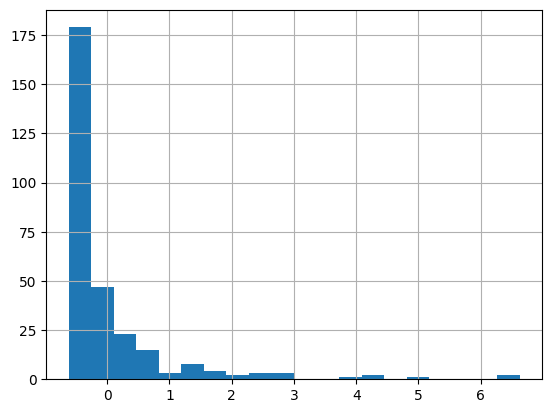

In [ ]:
# 로그 변환 전
scaled_data['revenue2'].hist(bins=20)

<Axes: >

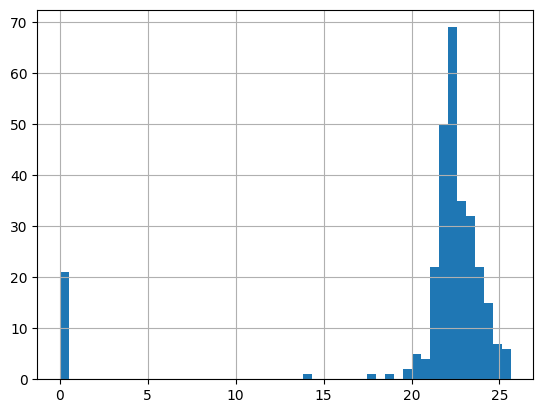

In [ ]:
# 로그 변환 후
scaled_data['log_revenue2'] = np.log1p(data['revenue2'])
#log1p: 1을 더해서 log를 취함.
scaled_data['log_revenue2'].hist(bins=50)

## 4. Box-Cox, Yeo-Johnson, Quantile Transformation
또 다른 여러가지 변환이 있습니다. 세가지 변환 모두 치우친 분포의 데이터를 정규 분포로 보정해주는 효과가 있으며,<br>
Box-Cox 변환의 경우 Log 변환과 함께 양수에만 적용할 수 있는 변환이고, Yeo-Johnsong 변환은 Box-Cox 변환의 제약인 음수를 가진 변수에서도 변환을 할 수 있는 변환입니다.<br>
Quantile 변환은 가장 자주 발생하는 값(the most frequent values.) 주위로 분포를 조정하며, 이상치의 영향을 감소시켜주는 특징도 있습니다.

- Box-Cox 변환은 Lambda 값에 따라 변환이 달라지게 되는데, Lambda 값이 0일 경우 Log 변환과 동일합니다.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_map_data_to_normal_001.png'>

#### ref
- [Scikit-learn PowerTransformer, Box-Cox, Yeo-Johnson Transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)
- [Scikit-learn Quantile Transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)
- [Scikit-learn Map Data To Normal Dist](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py)

<Axes: >

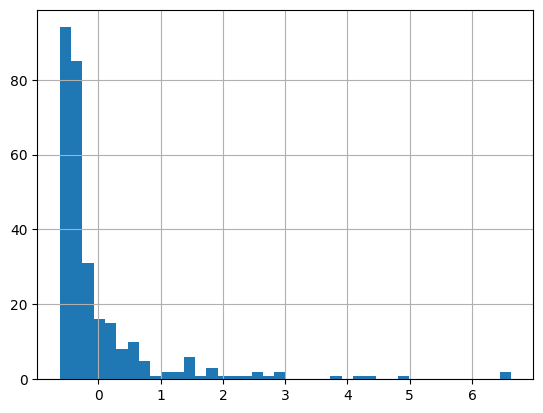

In [ ]:
# 변환 전
scaled_data['revenue2'].hist(bins=40)

<Axes: >

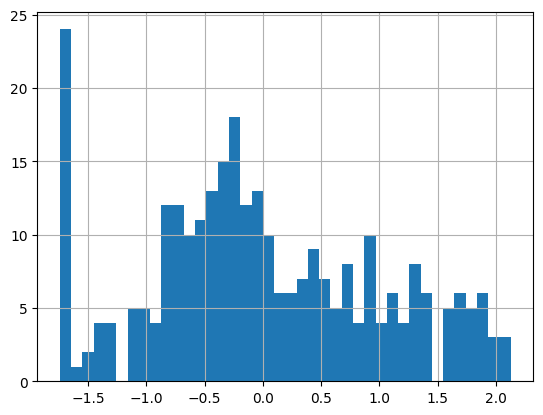

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')

scaled_data['box_cox_revenue2'] = trans.fit_transform(scaled_data['revenue2'].values.reshape(-1, 1) + 1)
scaled_data['box_cox_revenue2'].hist(bins=40)

<Axes: >

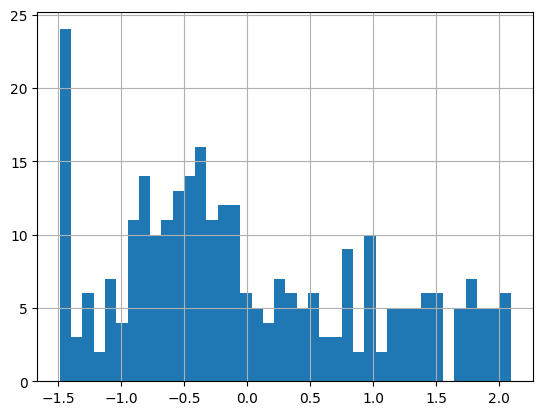

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')

scaled_data['yeo_johnson_revenue2'] = trans.fit_transform(scaled_data['revenue2'].values.reshape(-1, 1))
scaled_data['yeo_johnson_revenue2'].hist(bins=40)

<Axes: >

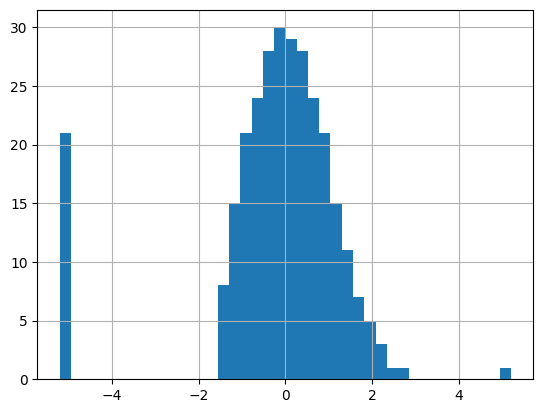

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')

scaled_data['quantile_revenue2'] = trans.fit_transform(scaled_data['revenue2'].values.reshape(-1, 1))
scaled_data['quantile_revenue2'].hist(bins=40)

# Imputation
## 대표 값을 사용한 결측치 처리
정형 데이터를 다루다보면, 값이 NaN(Not a Number or Null)으로 되어있는 경우가 있습니다. 이러한 값을 결측치라 하며, <br>
가장 간단한 방법으로 평균이나 중간값 또는 최빈값 같은 변수의 대표값을 사용할 수 있습니다. <br><br>

결측치를 확인하는 방법으로 Pandas의 `isna() + sum()` 메소드를 사용할 수 있습니다.

In [ ]:
data.head()

,inst_id,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [ ]:
pd.isna(data)

,inst_id,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
299,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [ ]:
pd.isna(data).sum()

inst_id                0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8
liquidAsset2           8


In [ ]:
pd.isna(data).sum().sum()

425


### 1. Mean(평균)

확률 이론과 통계 관점에서 (모)평균 또는 기댓값은 중심에 대한 경향성을 알 수 있는 척도입니다.<br>
일반적으로 평균이라고 부르는 것으로 산술 평균이라고 하고, 이 평균은 표본 평균이라고도 합니다.<br>
평균은 모든 관측치의 값을 모두 반영하므로 `지나치게 작거나 큰 값(이상치)들의 영향을 많이` 받게 됩니다.<br>
평균은 모든 샘플의 값을 더하고, 샘플의 개수로 나누어 계산할 수 있습니다.<br>

$$ E(x) = {\sum x \over n}$$

평균, 중간값, 최빈값으로 결측치를 처리하는 SimpleImputer는 Scikit-Learn에서 impute 패키지에 있습니다.

In [ ]:
mean_df = data.copy()

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(mean_df[num_columns])
mean_df[num_columns] = imputer.transform(mean_df[num_columns])

In [ ]:
pd.isna(mean_df[num_columns]).sum()

inst_id               0
sgg                   0
openDate              0
bedCount              0
revenue1              0
salescost1            0
sga1                  0
salary1               0
noi1                  0
noe1                  0
interest1             0
ctax1                 0
profit1               0
liquidAsset1          0
quickAsset1           0
receivableS1          0
inventoryAsset1       0
nonCAsset1            0
tanAsset1             0
OnonCAsset1           0
receivableL1          0
debt1                 0
liquidLiabilities1    0
shortLoan1            0
NCLiabilities1        0
longLoan1             0
netAsset1             0
surplus1              0
revenue2              0
salescost2            0
sga2                  0
salary2               0
noi2                  0
noe2                  0
interest2             0
ctax2                 0
profit2               0
liquidAsset2          0
quickAsset2           0
receivableS2          0
inventoryAsset2       0
nonCAsset2      

### 2. Median(중간값)
중간값은 데이터 샘플을 개수에 대해서 절반으로 나누는 위치의 값을 말합니다. <br>
데이터 샘플의 수가 짝수개일 때에는 중간에 위치한 두 값의 평균을 사용합니다.<br>
중간값은 모든 관측치의 값을 모두 반영하지 않으므로 `지나치게 작거나 큰 값(이상치)들의 영향을 덜` 받습니다.<br>
중간값은 샘플을 값에 대해 정렬하고, 중앙에 위치한 값으로 구할 수 있습니다.

In [ ]:
median_df = data.copy()

In [ ]:
imputer = SimpleImputer(strategy='median')
imputer.fit(median_df[num_columns])
median_df[num_columns] = imputer.transform(median_df[num_columns])

In [ ]:
pd.isna(median_df[num_columns]).sum()

inst_id               0
sgg                   0
openDate              0
bedCount              0
revenue1              0
salescost1            0
sga1                  0
salary1               0
noi1                  0
noe1                  0
interest1             0
ctax1                 0
profit1               0
liquidAsset1          0
quickAsset1           0
receivableS1          0
inventoryAsset1       0
nonCAsset1            0
tanAsset1             0
OnonCAsset1           0
receivableL1          0
debt1                 0
liquidLiabilities1    0
shortLoan1            0
NCLiabilities1        0
longLoan1             0
netAsset1             0
surplus1              0
revenue2              0
salescost2            0
sga2                  0
salary2               0
noi2                  0
noe2                  0
interest2             0
ctax2                 0
profit2               0
liquidAsset2          0
quickAsset2           0
receivableS2          0
inventoryAsset2       0
nonCAsset2      

### 3. Iterative Impute (R 언어의 MICE 패키지)
Round robin 방식으로 반복하여 결측값을 회귀하는 방식으로 결측치를 처리합니다. <br>
결측값을 회귀하는 방식으로 처리하기 때문에 수치형 변수에만 적용할 수 있습니다.

1. 각 결측치를 해당 변수의 평균으로 채워넣는다.
2. 대체할 변수의 결측치는 제외한 상태로 해당 변수의 결측치를 회귀모델을 이용하여 예측한다.
3. 다른 변수에서도 해당 방식을 반복한다.
4. 모든 변수에 대해 반복 후 해당 이터레이션에서 맨 처음에 할당했던 값과의 차이를 계산한다.
5. 해당 값의 차이가 0이 될 때(수렴)까지 반복한다.

MICE 알고리즘으로 결측치를 처리하는 IterativeImputer는 Scikit-Learn에서 impute 패키지에 있습니다.

#### ref
- [Scikit-Learn, Iterative Imputer (MICE)](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html?highlight=mice)
- [MICE 알고리즘 설명](https://ichi.pro/ko/deiteo-seteueseo-gyeol-cheuggabs-eul-daechihaneun-mice-algolijeum-217004654686142)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
impute_df = data.copy()

In [ ]:
imp_mean = IterativeImputer(random_state=0)
impute_df[num_columns] = imp_mean.fit_transform(impute_df[num_columns])

In [ ]:
pd.isna(impute_df[num_columns]).sum()

inst_id               0
sgg                   0
openDate              0
bedCount              0
revenue1              0
salescost1            0
sga1                  0
salary1               0
noi1                  0
noe1                  0
interest1             0
ctax1                 0
profit1               0
liquidAsset1          0
quickAsset1           0
receivableS1          0
inventoryAsset1       0
nonCAsset1            0
tanAsset1             0
OnonCAsset1           0
receivableL1          0
debt1                 0
liquidLiabilities1    0
shortLoan1            0
NCLiabilities1        0
longLoan1             0
netAsset1             0
surplus1              0
revenue2              0
salescost2            0
sga2                  0
salary2               0
noi2                  0
noe2                  0
interest2             0
ctax2                 0
profit2               0
liquidAsset2          0
quickAsset2           0
receivableS2          0
inventoryAsset2       0
nonCAsset2      

### 4. Mode(최빈값)
최빈값은 범주형 변수에서 가장 자주 등장하는 값을 말합니다.<br>

In [ ]:
mode_df = data.copy()

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(mode_df[cat_columns])
mode_df[cat_columns] = imputer.transform(mode_df[cat_columns])

In [ ]:
pd.isna(mode_df[cat_columns]).sum()

sido           0
instkind       0
ownerChange    0
dtype: int64

# Categorical Variable to Numeric Variable
이번에는 범주형 변수를 수치형 변수로 나타내는 방법에 대해 알아보겠습니다. <br>
여기에서 범주형 변수란, 차의 등급을 나타내는 [소형, 중형, 대형] 처럼 표현되는 변수를 말합니다. <br>
범주형 변수는 주로 데이터 상에서 문자열로 표현되는 경우가 많으며, 문자와 숫자가 매핑되는 형태로 표현되기도 합니다.<br>

## 1. Label Encoding
라벨 인코딩은 n개의 범주형 데이터를 0~n-1 의 연속적인 수치 데이터로 표현합니다.<br>
예를 들어, 차의 등급 변수를 라벨 인코딩으로 변환하면 다음과 같이 표현할 수 있습니다.<br>
소형 : 0 <br>
중형 : 1 <br>
대형 : 2 <br>
라벨 인코딩은 간단한 방법이지만, '소형'과 '중형'이라는 범주형 데이터가 가지고 있는 차이가 0과 1의 수치적인 차이라는 의미가 아님을 주의하셔야 합니다.

Label Encoding과 Scikit-Learn의 preprocessing 패키지에 있습니다.

이번에는 병원 개/폐업 데이터의 target이었던, OC 변수를 수치형 변수로 변환하겠습니다.

#### ref
- [Scikit-Learn Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=label%20encoder#sklearn.preprocessing.LabelEncoder)

In [ ]:
data = pd.read_csv(example_file)
label = pd.DataFrame(data['OC'])

label.head()

,OC
0,open
1,open
2,open
3,open
4,open


#### 1) 모델 불러오기 및 정의하기

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### 2) 데이터에서 특징 찾기 (범주의 수)

In [ ]:
le.fit(label)

LabelEncoder()

In [ ]:
# classes_ 속성에 있는 순서(index)대로 라벨 번호가 부여됩니다.
le.classes_

array([' close', 'open'], dtype=object)

#### 3) 데이터 변환 (범주형 변수를 수치형 변수로)

In [ ]:
label_encoded = le.transform(label)

#### 4) 결과 살펴보기

In [ ]:
le_df = pd.DataFrame(label_encoded, columns = ['label_encoded'])

result = pd.concat([label, le_df], axis=1)
result.sort_values('label_encoded', inplace=True)

result.head(20)

,OC,label_encoded
261,close,0
177,close,0
93,close,0
212,close,0
214,close,0
141,close,0
71,close,0
290,close,0
35,close,0
158,close,0


## 2. One-hot Encoding
원핫 인코딩은 n개의 범주형 데이터를 n개의 비트(0,1) 벡터로 표현합니다. <br>
예를 들어, 위에서 언급한 소형, 중형, 대형으로 이루어진 범주형 변수를 원핫 인코딩을 통해 변환하면 다음과 같이 표현할 수 있습니다.<br>
소형 : [1, 0, 0] <br>
중형 : [0, 1, 0] <br>
대형 : [0, 0, 1] <br>
원핫 인코딩으로 범주형 데이터를 나타내게되면, 서로 다른 범주에 대해서는 벡터 내적을 취했을 때 내적 값이 0이 나오게 됩니다. <br>
이는 서로 다른 범주 데이터는 독립적인 관계라는 것을 표현할 수 있게 됩니다.

One-hot Encoding은 Sklearn의 preprocessing 패키지에 있습니다.

Sklearn의 One-hot Encoder는 numpy 행렬로 입력을 넣어줘야 정상적으로 작동하므로, pandas DataFrame에서 numpy-array로 추출하여 사용합니다.


#### ref
- [Scikit-Learn One-Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

#### 1) 모델 불러오기 및 정의하기

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

#### 2) 데이터에서 특징 찾기 (범주의 수)

In [ ]:
ohe.fit(label)

OneHotEncoder(sparse=False, sparse_output=False)

#### 3) 데이터 변환 (범주형 변수를 수치형 변수로)

In [ ]:
one_hot_encoded = ohe.transform(label)

#### 4) 결과 살펴보기

In [ ]:
ohe_df = pd.DataFrame(one_hot_encoded, columns = ohe.categories_[0])
result = pd.concat([label, ohe_df], axis=1)

result.head(10)

,OC,close,open
0,open,0.0,1.0
1,open,0.0,1.0
2,open,0.0,1.0
3,open,0.0,1.0
4,open,0.0,1.0
5,open,0.0,1.0
6,open,0.0,1.0
7,open,0.0,1.0
8,open,0.0,1.0
9,open,0.0,1.0
